***Zomato Data Analysis Project***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Zomatodata.csv")
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


***Step_1 - Data Cleaning & Data pre-processing***

In [3]:
# getting clear & overall information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
def handleRate(rate):
    value=str(rate).split("/")
    value=value[0]
    return float(value)

In [5]:
# converting rate in suitable format
print("Before \n",data["rate"])
data["rate"]=data["rate"].apply(handleRate)
print("After \n",data["rate"])

Before 
 0      4.1/5
1      4.1/5
2      3.8/5
3      3.7/5
4      3.8/5
       ...  
143    3.3/5
144    3.3/5
145    4.0/5
146    3.0/5
147    3.9/5
Name: rate, Length: 148, dtype: object
After 
 0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64


***Task1 - Type Of Resturant***

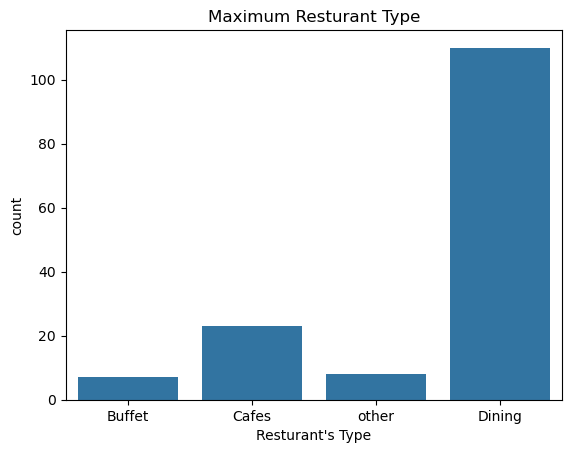

In [31]:
sns.countplot(x=data["listed_in(type)"]) # countplot is used to make barplot using single column
plt.xlabel("Resturant's Type")
plt.title("Maximum Resturant Type")
plt.show()

***Conclusion :*** Maximum Resturant falls in Dinning category

***Task2 - Vote received by each resturant type***

In [20]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [9]:
groupeddata=data.groupby("listed_in(type)")["votes"].sum() # used to get vote's sum of each resturant category
result=pd.DataFrame({"votes":groupeddata})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


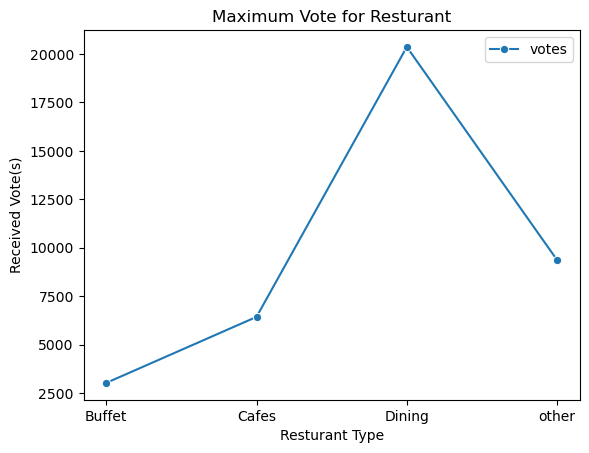

In [32]:
sns.lineplot(result,marker="o")
plt.xlabel("Resturant Type")
plt.ylabel("Received Vote(s)")
plt.title("Maximum Vote for Resturant")
plt.show()

***Conclusion -*** Dinning Resturants have the maximum vote

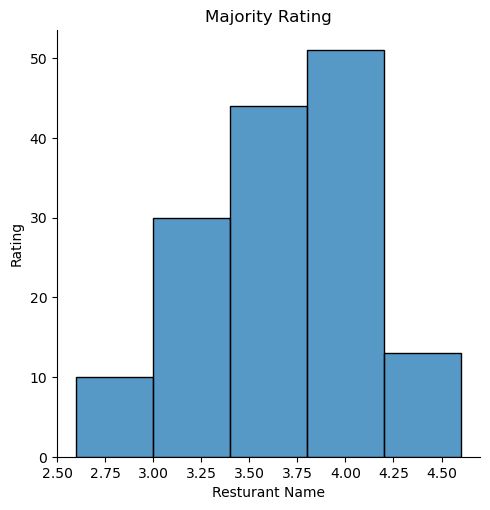

In [33]:
# sns.barplot(x="listed_in(type)",y="rate",data=data)
sns.displot(data["rate"],bins=5)
plt.xlabel("Resturant Name")
plt.ylabel("Rating")
plt.title("Majority Rating")
plt.show()

***Conclusion -*** Majority of Resturants are getting rates b/w 3.40 to 4.20

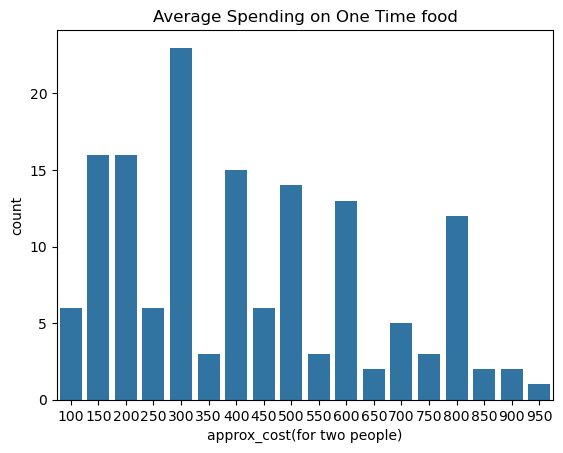

In [34]:
avgSpending=data["approx_cost(for two people)"]
sns.countplot(x=avgSpending)
plt.title("Average Spending on One Time food")
plt.show()

***Conclusion -*** Avg spending on one time food is 300

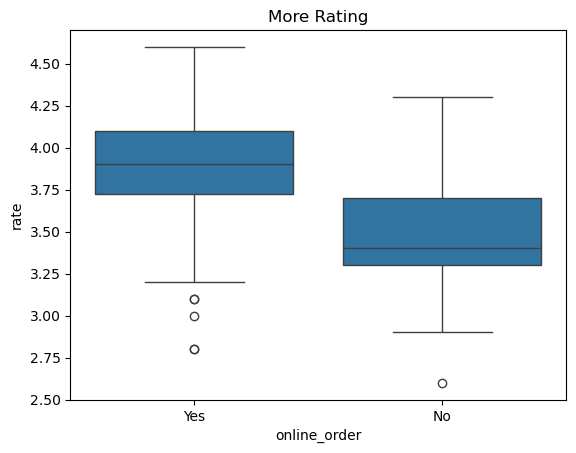

In [45]:
sns.boxplot(x="online_order",y="rate",data=data)
plt.title("More Rating")
plt.show()

In [35]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


***Conclusion -*** Online orders receive more rating